# Experimentos baseados em Deep Learning

- Utilizando cada paredão como teste e avaliando com holdout.

In [1]:
import pandas as pd 
import numpy as np 
from regression_utils import *
import fastai
from fastai.tabular import *

In [2]:
NORMALIZE = False
EPOCHS = 40
LAYERS = [20, 20, 20]
LR = 1e-2
DEVICE="TODO"

In [3]:
REMOVE = ["positivos", "neutros", "negativos", "likes", "retweets", "day2", "day3"]

In [4]:
summary_df = pd.DataFrame(columns=set(COLUMNS) - set(REMOVE))

# Paredao 1

In [5]:
train_df, test_df = get_train_test(1, normalize=NORMALIZE, drop_columns=REMOVE)

In [6]:
test_df

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
24,1,bianca_andrade,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,411880,576,59,0.2446
25,1,lucas_chumbo,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,12014,64,1425,0.7594


In [7]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [8]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [9]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


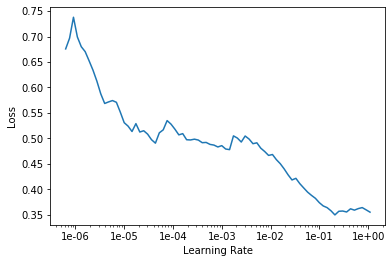

In [10]:
learner.recorder.plot()

In [11]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.689756,0.006222,0.006222,00:00
1,0.527968,0.011661,0.011661,00:00
2,0.425656,0.014521,0.014521,00:00
3,0.341525,0.126994,0.126994,00:00
4,0.303715,0.122212,0.122212,00:00
5,0.257720,0.102206,0.102206,00:00
6,0.234183,0.226567,0.226567,00:00
7,0.210601,0.057974,0.057974,00:00
8,0.196134,0.111074,0.111074,00:00
9,0.180295,0.075959,0.075959,00:00


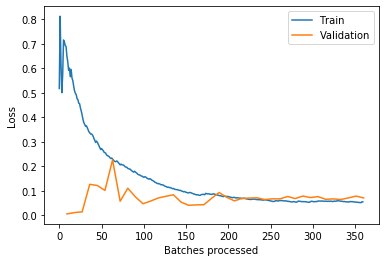

In [12]:
learner.recorder.plot_losses()

In [13]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [14]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [15]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
25,1,lucas_chumbo,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,12014,64,1425,0.7594,0.391477
24,1,bianca_andrade,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,411880,576,59,0.2446,0.137751


# Paredao 2

In [16]:
train_df, test_df = get_train_test(2, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
20,2,babu,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,325345,39,141,0.0044
21,2,petrix,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,22414,62,10253,0.8027
22,2,pyong,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,1431039,293,112,0.0066
23,2,hadson,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,10207,24,4289,0.1863


In [17]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [18]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [19]:
learner.fit_one_cycle(EPOCHS, LR)


epoch,train_loss,valid_loss,mean_squared_error,time
0,0.371600,0.185940,0.185940,00:00
1,0.363193,0.175216,0.175216,00:00
2,0.323154,0.227979,0.227979,00:00
3,0.311129,0.609831,0.609831,00:00
4,0.274605,1.158310,1.158310,00:00
5,0.242234,1.518427,1.518427,00:00
6,0.209496,2.299157,2.299157,00:00
7,0.185822,1.397619,1.397619,00:00
8,0.173122,0.790914,0.790914,00:00
9,0.166410,0.295667,0.295667,00:00


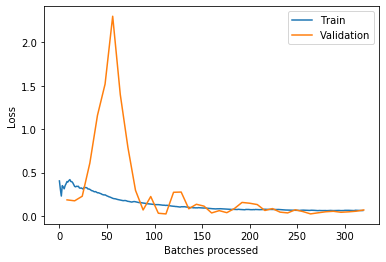

In [20]:
learner.recorder.plot_losses()

In [21]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [22]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [23]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
21,2,petrix,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,22414,62,10253,0.8027,0.579061
23,2,hadson,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,10207,24,4289,0.1863,0.395447
20,2,babu,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,325345,39,141,0.0044,0.254997
22,2,pyong,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,1431039,293,112,0.0066,0.195330


# Paredao 3

In [24]:
train_df, test_df = get_train_test(3, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
9,3,felipe_prior,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,204031,116,76,0.2029
10,3,hadson,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,10207,32,1411,0.7971


In [25]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [26]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [27]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.300720,0.176105,0.176105,00:00
1,0.265247,0.201294,0.201294,00:00
2,0.235998,0.198815,0.198815,00:00
3,0.238712,0.150748,0.150748,00:00
4,0.210403,0.151498,0.151498,00:00
5,0.196678,0.036178,0.036178,00:00
6,0.180375,0.067561,0.067561,00:00
7,0.165214,0.114387,0.114387,00:00
8,0.145581,0.094187,0.094187,00:00
9,0.128958,0.068886,0.068886,00:00


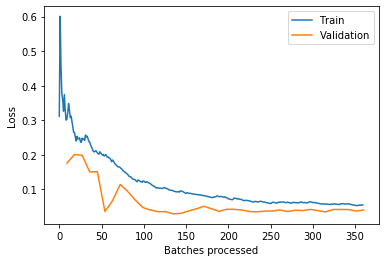

In [28]:
learner.recorder.plot_losses()

In [29]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [30]:

test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [31]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
10,3,hadson,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,10207,32,1411,0.7971,0.567471
9,3,felipe_prior,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,204031,116,76,0.2029,0.472244


# Paredao 4

In [32]:
train_df, test_df = get_train_test(4, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
29,4,babu,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,325345,136,315,0.0130
30,4,victor_hugo,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,14399,51,570,0.3608
31,4,lucas,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,23670,218,5952,0.6262


In [33]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [34]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.294955,0.060201,0.060201,00:00
1,0.349055,0.107364,0.107364,00:00
2,0.310196,0.234146,0.234146,00:00
3,0.284791,0.350315,0.350315,00:00
4,0.252052,0.260379,0.260379,00:00
5,0.237924,0.192812,0.192812,00:00
6,0.223019,0.525778,0.525778,00:00
7,0.208384,0.384477,0.384477,00:00
8,0.187815,0.426904,0.426904,00:00
9,0.164999,0.522056,0.522056,00:00


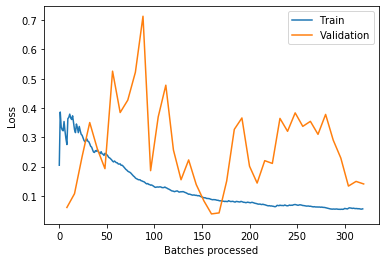

In [35]:
learner.recorder.plot_losses()

In [36]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [37]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [38]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
31,4,lucas,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,23670,218,5952,0.6262,0.384124
30,4,victor_hugo,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,14399,51,570,0.3608,0.248744
29,4,babu,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,325345,136,315,0.0130,0.242218


# Paredao 5

In [39]:
train_df, test_df = get_train_test(5, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
3,5,bianca_andrade,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,411880,608,1918,0.5309
4,5,flayslene,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,104138,283,2872,0.1764
5,5,felipe_prior,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,204031,798,7069,0.2927


In [40]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [41]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.550597,0.147974,0.147974,00:00
1,0.595251,0.030609,0.030609,00:00
2,0.516319,0.018523,0.018523,00:00
3,0.458747,0.087003,0.087003,00:00
4,0.436312,0.043095,0.043095,00:00
5,0.395099,0.758779,0.758779,00:00
6,0.340414,3.894276,3.894276,00:00
7,0.287417,7.641058,7.641058,00:00
8,0.244985,7.495782,7.495782,00:00
9,0.217831,2.656864,2.656864,00:00


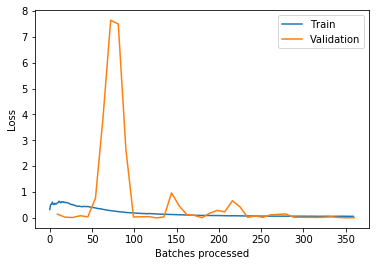

In [42]:
learner.recorder.plot_losses()

In [43]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [44]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [45]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
3,5,bianca_andrade,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,411880,608,1918,0.5309,0.313832
4,5,flayslene,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,104138,283,2872,0.1764,0.311816
5,5,felipe_prior,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,204031,798,7069,0.2927,0.114831


# Paredao 6

In [46]:
train_df, test_df = get_train_test(6, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
0,6,gizelly_bicalho,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,234977,1348,427,0.0064
1,6,guilherme,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,103421,244,27184,0.5607
2,6,pyong,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,1431039,1884,14897,0.4329


In [47]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [48]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.646340,0.179204,0.179204,00:00
1,0.608111,0.144070,0.144070,00:00
2,0.519123,0.125252,0.125252,00:00
3,0.462460,0.053360,0.053360,00:00
4,0.420225,0.041120,0.041120,00:00
5,0.373978,0.048387,0.048387,00:00
6,0.331923,0.034471,0.034471,00:00
7,0.300502,0.076960,0.076960,00:00
8,0.268472,0.068609,0.068609,00:00
9,0.245129,0.032656,0.032656,00:00


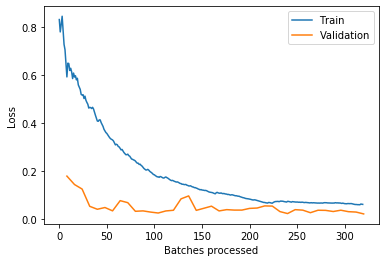

In [49]:
learner.recorder.plot_losses()

In [50]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [51]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [52]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
1,6,guilherme,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,103421,244,27184,0.5607,0.450670
0,6,gizelly_bicalho,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,234977,1348,427,0.0064,0.285257
2,6,pyong,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,1431039,1884,14897,0.4329,0.197232


# Paredao 7

In [53]:
train_df, test_df = get_train_test(7, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
6,7,babu,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,325345,1590,210,0.0460
7,7,manu_gavassi,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,4327060,1823,424,0.1018
8,7,victor_hugo,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,14399,46,2473,0.8522


In [54]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [55]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.407194,0.568626,0.568626,00:00
1,0.566416,0.547113,0.547113,00:00
2,0.492730,0.538994,0.538994,00:00
3,0.492019,0.490507,0.490507,00:00
4,0.430732,0.356433,0.356433,00:00
5,0.368783,0.256209,0.256209,00:00
6,0.350071,0.258822,0.258822,00:00
7,0.307306,0.290089,0.290089,00:00
8,0.292684,0.162476,0.162476,00:00
9,0.258769,0.135902,0.135902,00:00


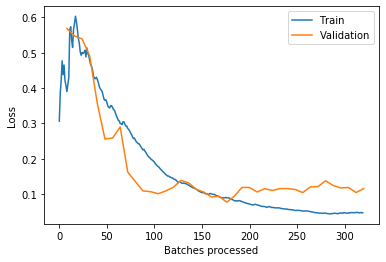

In [56]:
learner.recorder.plot_losses()

In [57]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [58]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [59]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
7,7,manu_gavassi,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,4327060,1823,424,0.1018,0.299278
6,7,babu,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,325345,1590,210,0.0460,0.214517
8,7,victor_hugo,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,14399,46,2473,0.8522,0.200993



# Paredao 8

In [60]:
train_df, test_df = get_train_test(8, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
17,8,babu,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,325345,4768,19543,0.4771
18,8,rafa,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,293473,2998,439,0.0059
19,8,pyong,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,1431039,2876,27574,0.5170


In [61]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [62]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.518646,0.297924,0.297924,00:00
1,0.577506,0.247271,0.247271,00:00
2,0.583860,0.257443,0.257443,00:00
3,0.531029,0.201572,0.201572,00:00
4,0.480955,0.252266,0.252266,00:00
5,0.417810,0.245062,0.245062,00:00
6,0.378465,0.083317,0.083317,00:00
7,0.325111,0.041747,0.041747,00:00
8,0.296950,0.062748,0.062748,00:00
9,0.266775,0.053227,0.053227,00:00


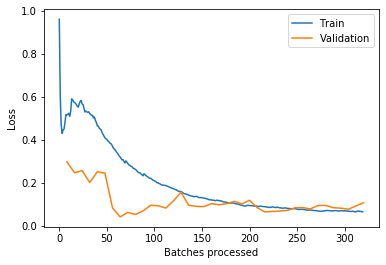

In [63]:
learner.recorder.plot_losses()

In [64]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [65]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [66]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
19,8,pyong,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,1431039,2876,27574,0.5170,0.501655
17,8,babu,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,325345,4768,19543,0.4771,0.383223
18,8,rafa,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,293473,2998,439,0.0059,0.274879


# Paredão 9

In [67]:
train_df, test_df = get_train_test(9, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
14,9,daniel,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,33876,124,19608,0.8082
15,9,flayslene,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,104138,2038,1033,0.0954
16,9,ivy,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,59125,71,3050,0.0964


In [68]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [69]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.930771,0.530440,0.530440,00:00
1,0.813702,0.528384,0.528384,00:00
2,0.701609,0.675157,0.675157,00:00
3,0.611883,0.499039,0.499039,00:00
4,0.550586,0.399339,0.399339,00:00
5,0.494098,0.331305,0.331305,00:00
6,0.428413,0.234806,0.234806,00:01
7,0.353899,0.222774,0.222774,00:00
8,0.294343,0.198254,0.198254,00:00
9,0.262264,0.154142,0.154142,00:00


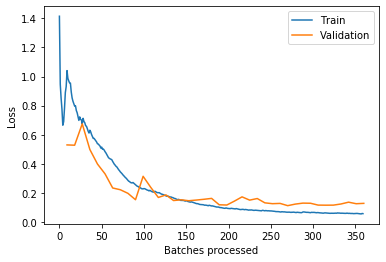

In [70]:
learner.recorder.plot_losses()

In [71]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [72]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [73]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
16,9,ivy,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,59125,71,3050,0.0964,0.367845
14,9,daniel,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,33876,124,19608,0.8082,0.367046
15,9,flayslene,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,104138,2038,1033,0.0954,0.355006


# Paredão 10

In [74]:
train_df, test_df = get_train_test(10, normalize=NORMALIZE, drop_columns=REMOVE)
test_df

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao
11,10,manu_gavassi,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,4785334,30069,40235,0.4251
12,10,mari,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,269733,2982,3304,0.0076
13,10,felipe_prior,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,642881,12535,95402,0.5673


In [75]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [76]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.655123,0.007443,0.007443,00:00
1,0.963417,0.005400,0.005400,00:00
2,0.933541,0.038147,0.038147,00:00
3,0.821632,0.167458,0.167458,00:00
4,0.712172,0.557622,0.557622,00:00
5,0.590757,0.394724,0.394724,00:00
6,0.493304,0.318171,0.318171,00:00
7,0.406708,0.098788,0.098788,00:00
8,0.362059,0.344710,0.344710,00:00
9,0.317979,0.448037,0.448037,00:00


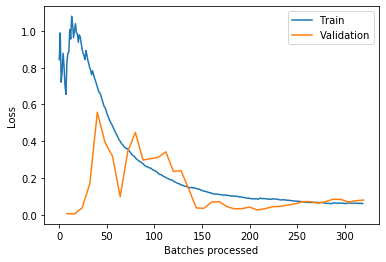

In [77]:
learner.recorder.plot_losses()

In [78]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [79]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [80]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,fica,fora,rejeicao,predicao
13,10,felipe_prior,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,642881,12535,95402,0.5673,1.085590
12,10,mari,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,269733,2982,3304,0.0076,0.256652
11,10,manu_gavassi,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,4785334,30069,40235,0.4251,-0.230789


# Sumarizando

In [81]:
summary_df

,negativos_global_pct,positivos_individual_pct,seguidores,fora,neutros_individual_pct,day1,positivos_global_pct,paredao,rejeicao,nome,negativos_individual_pct,neutros_global_pct,fica,predicao
0,0.207010,0.361998,411880,59,0.371080,5849,0.483052,1,0.2446,bianca_andrade,0.266922,0.326345,576,0.137751
1,0.792990,0.178042,12014,1425,0.352040,22759,0.516948,1,0.7594,lucas_chumbo,0.469919,0.673655,64,0.391477
2,0.028657,0.300946,325345,141,0.397872,5606,0.067775,2,0.0044,babu,0.301182,0.054604,39,0.254997
3,0.469254,0.146594,22414,10253,0.339433,46679,0.316781,2,0.8027,petrix,0.513974,0.446991,62,0.579061
4,0.096777,0.414681,1431039,112,0.316993,12527,0.353997,2,0.0066,pyong,0.268326,0.164906,293,0.195330
5,0.405312,0.147875,10207,4289,0.309531,25263,0.261447,2,0.1863,hadson,0.542595,0.333499,24,0.395447
6,0.468471,0.281135,204031,76,0.369039,1138,0.546440,3,0.2029,felipe_prior,0.349826,0.429299,116,0.472244
7,0.531529,0.208189,10207,1411,0.437694,1903,0.453560,3,0.7971,hadson,0.354117,0.570701,32,0.567471
8,0.339940,0.185986,325345,315,0.297259,18271,0.311138,4,0.0130,babu,0.516754,0.324375,136,0.242218
9,0.090035,0.227361,14399,570,0.369350,6845,0.129081,4,0.3608,victor_hugo,0.403289,0.136781,51,0.248744
